# Salish Sea cruise data - regression of Omega_ara vs DO

Regression of Salish Sea Omega_ara vs DO (and other selected variables) using data from Alin et al 2024 (https://bg.copernicus.org/articles/21/1639/2024/ and https://essd.copernicus.org/articles/16/837/2024/)

This regression analysis was performed using cross-validated optimzation of the XGBoost XGBRegressor as implemented in PyMLR xgb_auto (https://github.com/gjpelletier/PyMLR)

Before running this notebook, first install the PyMLR module in your environment using the following line:

In [1]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into the pandas dataframes

- df1: SalishCruise_dataProduct_2008to2018_12162024_CO2calcs.csv (https://www.ncei.noaa.gov/data/oceans/archive/arc0182/0238424/3.3/data/0-data/)
- df2: SalishCruises_2008to2018_MeasCalcParamsToNCEI_12162024.csv (https://www.ncei.noaa.gov/data/oceans/archive/arc0218/0283266/2.2/data/0-data/)

We will use df2 for the regression because it contains the calculated CO2 system variables (pH, Omega_ara, etc)

In [3]:
fn1 = '/mnt/c/z/data/ncei/Salish_Sea_cruise_data/Alin et al 2024/SalishCruise_dataProduct_2008to2018_12162024_CO2calcs.csv'
fn2 = '/mnt/c/z/data/ncei/Salish_Sea_cruise_data/Alin et al 2024/SalishCruises_2008to2018_MeasCalcParamsToNCEI_12162024.csv'
# Read the CSV file into a DataFrame
df1 = pd.read_csv(fn1)
df2 = pd.read_csv(fn2)

In [4]:
from PyMLR import show_dtypes
df2_dtypes = show_dtypes(df2)

                              dtype nunique isna_sum zero_sum one_sum
record                        int64    3971        0        0       1
EXPOCODE                     object      33        0        0       0
CRUISE_ID                    object      33        0        0       0
DATE_UTC                     object     130        0        0       0
TIME_UTC                     object    3288        0        0       0
DATE_LOCAL                   object     129        0        0       0
TIME_LOCAL                   object    3282        0        0       0
LONGITUDE_DEC               float64    1296        0        0       0
LATITUDE_DEC                float64    1417        0        0       0
STATION_NO                    int64      57        0        0      84
NISKIN_NO                     int64      24        0        0     549
MONTH_UTC                     int64      10        0        0       9
DAY_UTC                       int64      29        0        0     127
YEAR_UTC            

# Select the features

The following features will be used for the independent variables to predict pH

In [5]:
# features = ['RECOMMENDED_OXYGEN_MG_L','MONTH_UTC','CTDPRS_DBAR','CTDTMP_DEG_C_ITS90','CTDSAL_PSS78','SIGMATHETA_KG_M3']
features = ['RECOMMENDED_OXYGEN_MG_L','MONTH_UTC','CTDPRS_DBAR','CTDTMP_DEG_C_ITS90','CTDSAL_PSS78']

# Define X and y for the regression

In [6]:
X = df2[features]
y = df2['OmegaAragonite_Lueker']

# Split X and y into train and test subsets

In [7]:
# Split X and y into cross-validation train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost regression

Running optuna to find best parameters, could take a few minutes, please wait...
Fitting XGBRegressor model with best parameters, please wait ...

XGBRegressor goodness of fit to training data in model_outputs['stats']:

| Statistic          |   XGBRegressor |
|:-------------------|---------------:|
| R-squared          |     0.954874   |
| MSE                |     0.00959304 |
| RMSE               |     0.0979441  |
| Explained Variance |     0.955138   |
| MAE                |     0.0601687  |
| Max Error          |     0.891894   |
| MAPE               |     0.0598953  |
| MSLE               |     0.00193263 |
| n_samples          |  3176          |

Done
Time elapsed: 1773.39 sec



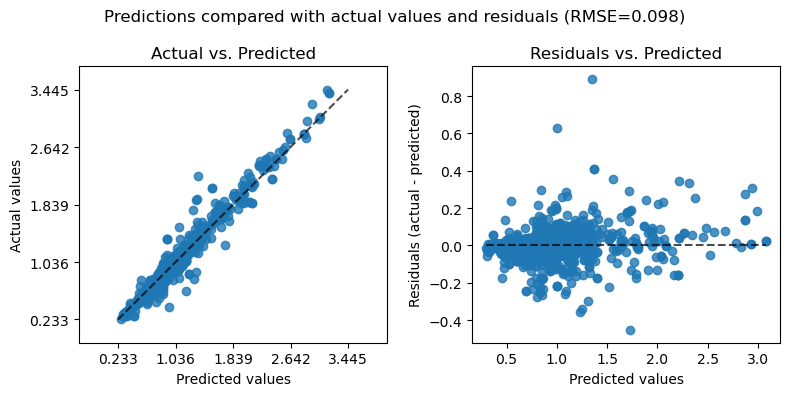

In [15]:
# Train the model with the training data subset
from PyMLR import xgb_auto
train_model_xgb_omara, train_output_xgb_omara = xgb_auto(X_train, y_train)


Goodness of fit to testing data in result['metrics']:

| Statistic          |    Regressor |
|:-------------------|-------------:|
| R-squared          |   0.888893   |
| MSE                |   0.0263249  |
| RMSE               |   0.162249   |
| Explained Variance |   0.889125   |
| MAE                |   0.0945645  |
| Max Error          |   1.04324    |
| MAPE               |   0.092006   |
| MSLE               |   0.00483425 |
| n_samples          | 795          |



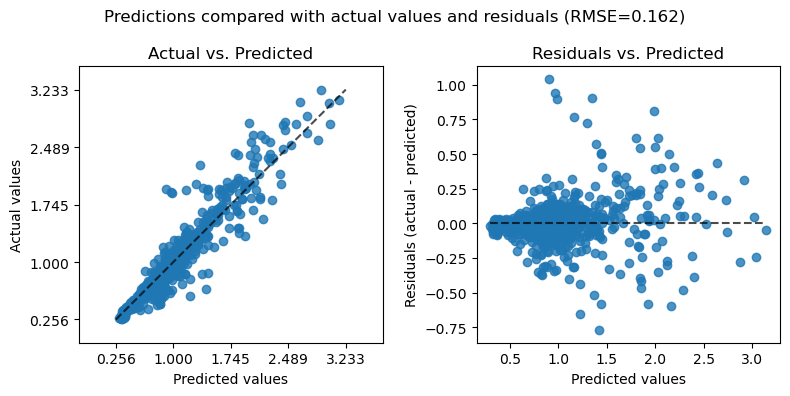

In [17]:
# Test the model with the testing data subset
from PyMLR import test_model
test_output_xgb_omara = test_model(train_model_xgb_omara, X_test, y_test, 
    preprocess_result= train_output_xgb_omara['preprocess_result'],
    selected_features= train_output_xgb_omara['selected_features'])

# save the plot of predictions vs actual and residuals
test_output_xgb_omara['fig'].savefig("XGBRegressor_predictions_test_Salish_Sea_OmegaAra_vs_DO_mgl.png", dpi=300)

Fitting XGBRegressor model, please wait ...


XGBRegressor goodness of fit to training data in model_outputs['stats']:

| Statistic          |   XGBRegressor |
|:-------------------|---------------:|
| R-squared          |     0.954902   |
| MSE                |     0.00980753 |
| RMSE               |     0.099033   |
| Explained Variance |     0.955166   |
| MAE                |     0.0611046  |
| Max Error          |     0.901816   |
| MAPE               |     0.0609865  |
| MSLE               |     0.00199385 |
| n_samples          |  3971          |

Done
Time elapsed: 4.96 sec



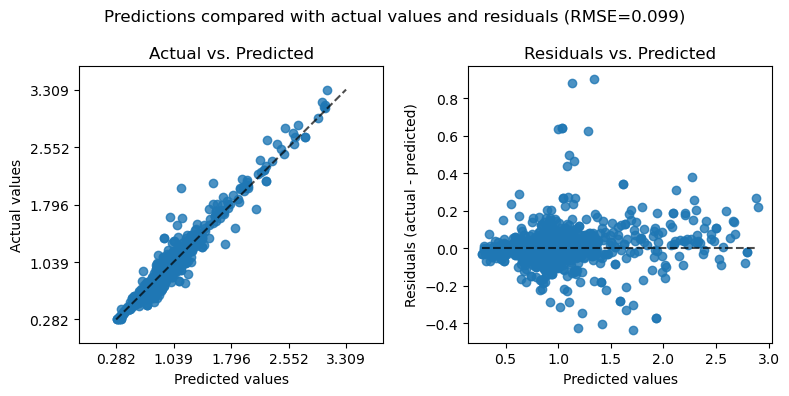

In [18]:
# Final fit of the model using all of the X and y data
from PyMLR import xgb
final_model_xgb_omara, final_output_xgb_omara = xgb(X, y, 
    **train_output_xgb_omara['best_params'],
    selected_features= train_output_xgb_omara['selected_features'])

Performing 4-step model agnostic analysis, please wait...

Step 1: Model skill metrics and residuals plot, please wait...

Model skill metrics:

| Statistic          |    Regressor |
|:-------------------|-------------:|
| R-squared          |   0.888893   |
| MSE                |   0.0263249  |
| RMSE               |   0.162249   |
| Explained Variance |   0.889125   |
| MAE                |   0.0945645  |
| Max Error          |   1.04324    |
| MAPE               |   0.092006   |
| MSLE               |   0.00483425 |
| n_samples          | 795          |



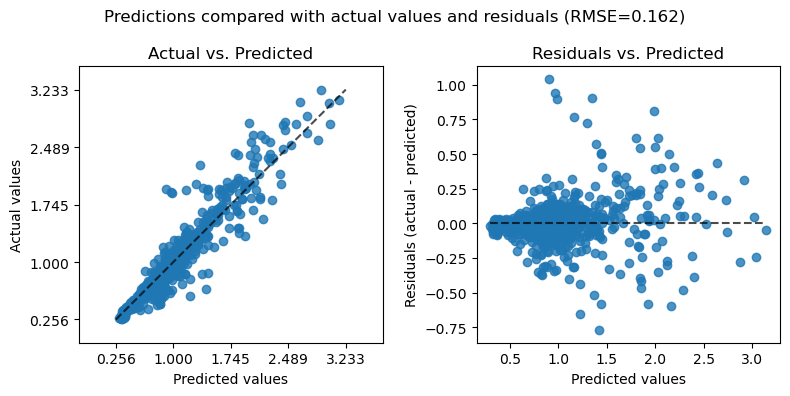

Step 2: SHAP Beeswarm and Bar importance...


 98%|===================| 782/795 [00:40<00:00]        

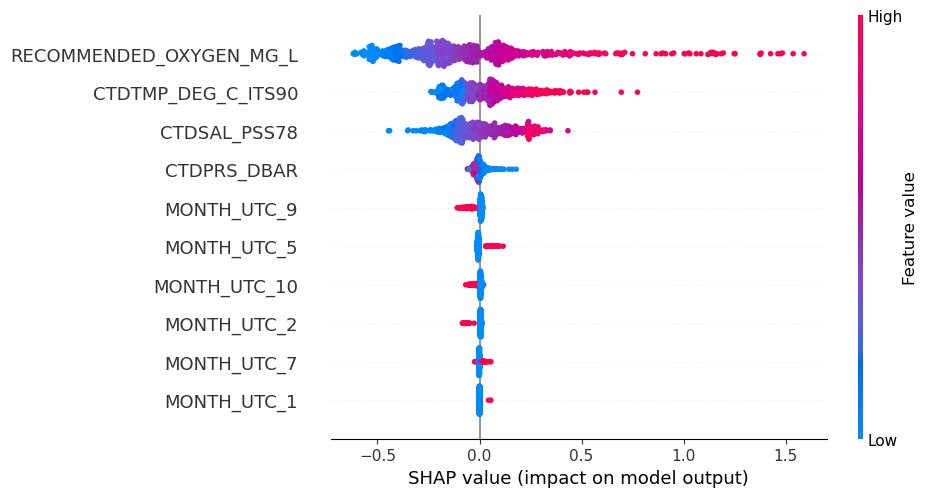

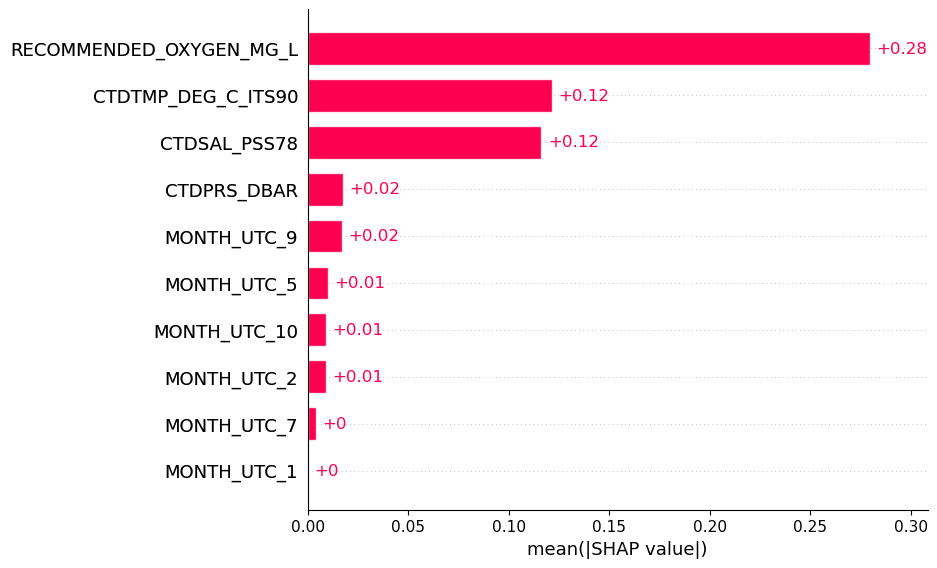

Step 3: Permutation Importance...


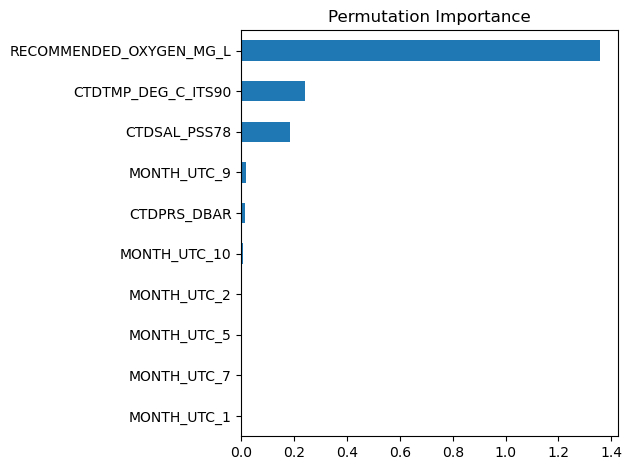

Step 4: PDP + ICE plots of each continuous features...
processing feature:  RECOMMENDED_OXYGEN_MG_L


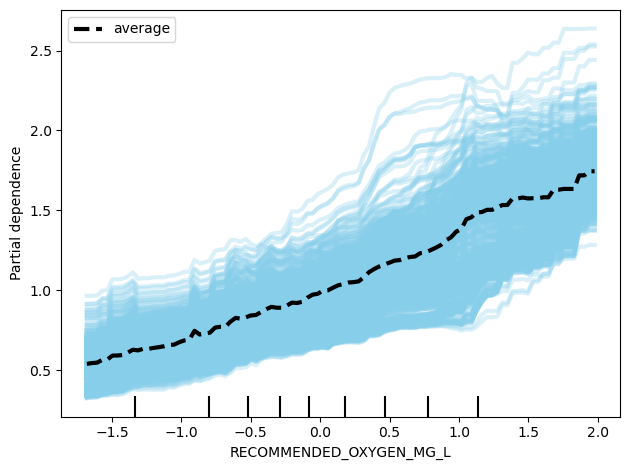

processing feature:  CTDTMP_DEG_C_ITS90


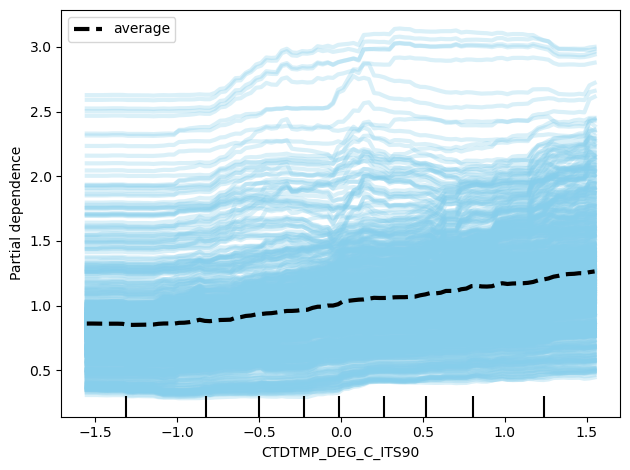

processing feature:  CTDSAL_PSS78


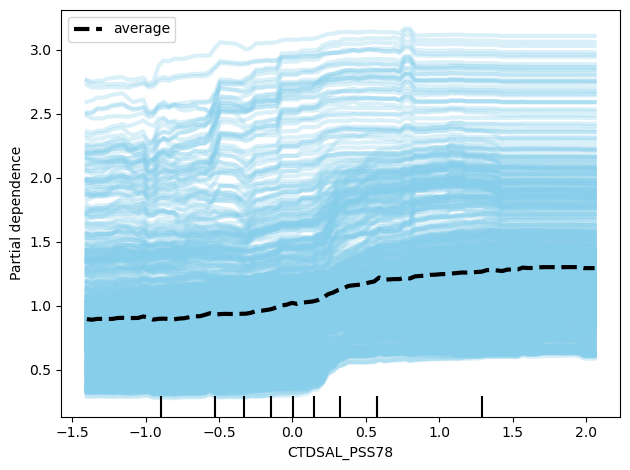

processing feature:  CTDPRS_DBAR


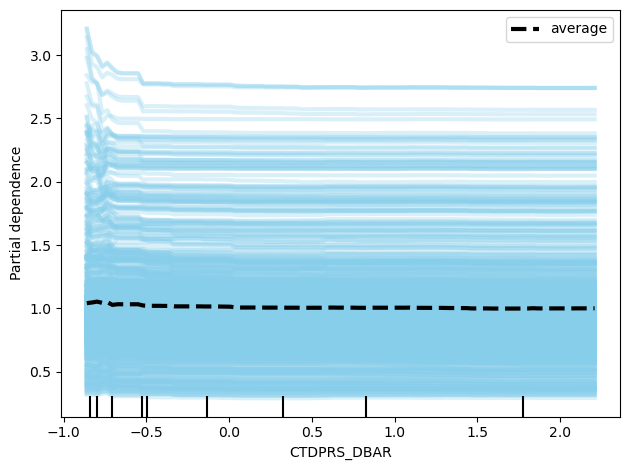

Interpretability plots saved to: model_agnostic_xgb_omara
Done
Time elapsed: 73.14 sec



In [20]:
# Model agnostics
from PyMLR import model_agnostic
agnostic_output_xgb_omara = model_agnostic(train_model_xgb_omara, X_test, y_test, 
    preprocess_result= train_output_xgb_omara['preprocess_result'],
    selected_features= train_output_xgb_omara['selected_features'],
    output_dir= 'model_agnostic_xgb_omara',
    show=True)

Best parameters:

learning_rate: 0.004626663137611806
max_depth: 8
min_child_weight: 3
subsample: 0.5250700202618542
colsample_bytree: 0.9283925012066279
gamma: 4.717277829564219e-06
reg_lambda: 1.3526577270955623e-08
alpha: 1.3000961149683923e-08
n_estimators: 914
num_features: 10
selector_type: f_regression

Best score: -0.1710522518894595



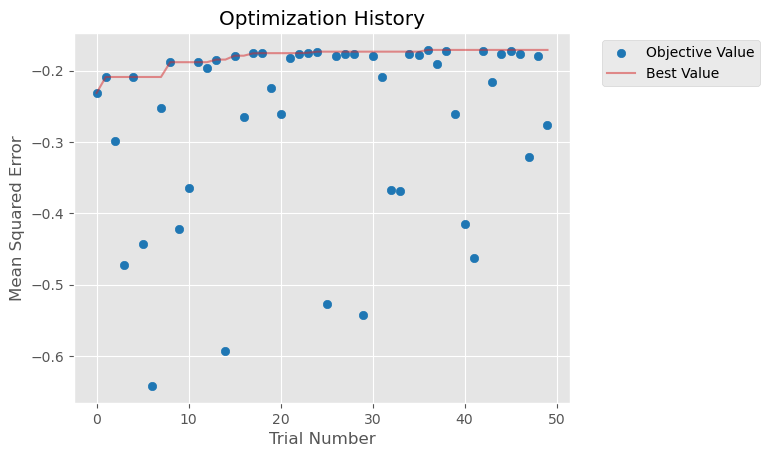

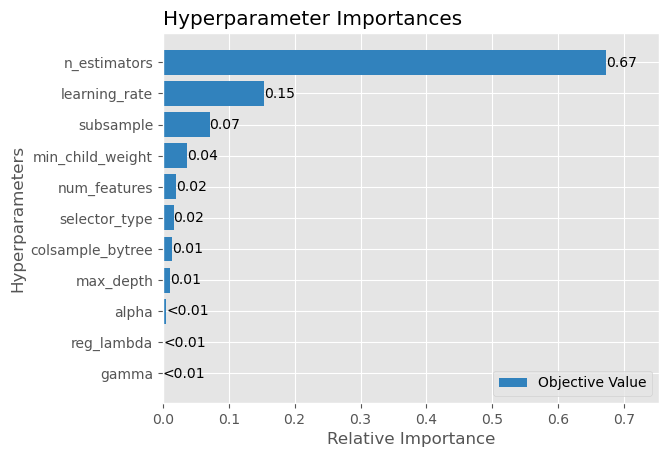

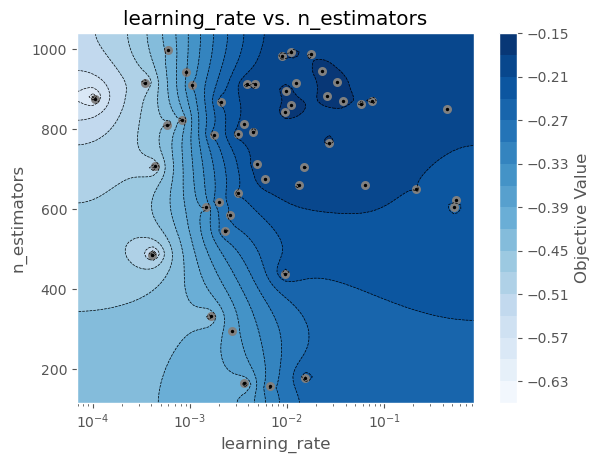

In [21]:
# Display the results of the hyperparameter optimization
from PyMLR import show_optuna
show_optuna(train_output_xgb_omara['optuna_study'])

# Lasso regression

Fitting Lasso regression models, please wait ...

Lasso regression statistics of best models in model_outputs['stats']:

| Statistic          |        LassoCV |    LassoLarsCV |   LassoLarsAIC |   LassoLarsBIC |
|:-------------------|---------------:|---------------:|---------------:|---------------:|
| alpha              |    0.000353645 |    1.81051e-17 |    1.18153e-17 |    0.000771289 |
| r-squared          |    0.779904    |    0.780351    |    0.780351    |    0.779221    |
| adjusted r-squared |    0.778859    |    0.779378    |    0.779378    |    0.778454    |
| n_samples          | 3176           | 3176           | 3176           | 3176           |
| df residuals       | 3161           | 3162           | 3162           | 3165           |
| df model           |   14           |   13           |   13           |   10           |
| F-statistic        |  800.066       |  864.132       |  864.132       | 1117.06        |
| Prob (F-statistic) |    1.11022e-16 |    1.11022e-16 |    

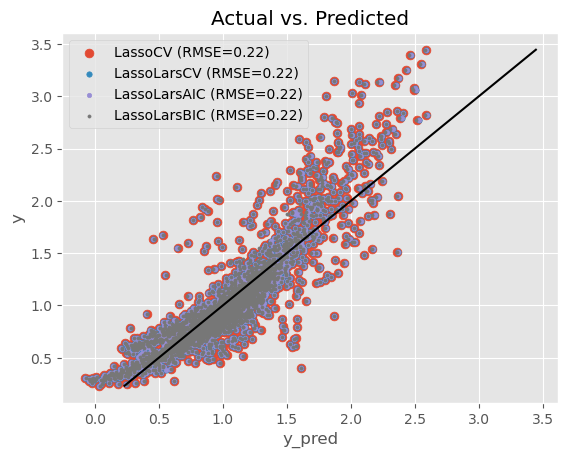

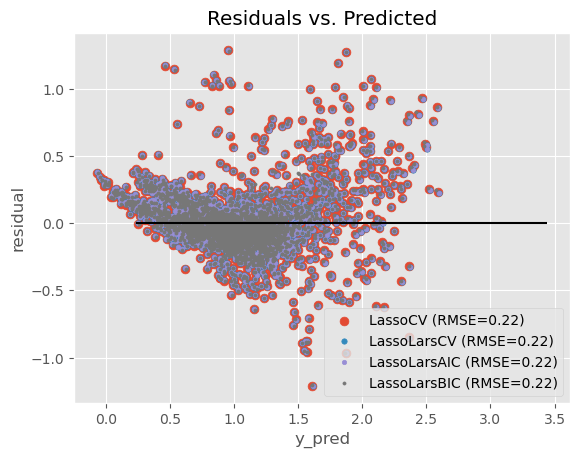

In [22]:
# Train the model with the training data subset
from PyMLR import lasso
train_model_lasso_omara, train_output_lasso_omara = lasso(X_train, y_train, verbose=1)


Goodness of fit to testing data in result['metrics']:

| Statistic          |    Regressor |
|:-------------------|-------------:|
| R-squared          |   0.795862   |
| MSE                |   0.0483667  |
| RMSE               |   0.219924   |
| Explained Variance |   0.795932   |
| MAE                |   0.14657    |
| Max Error          |   1.1707     |
| MAPE               |   0.154878   |
| MSLE               |   0.00943542 |
| n_samples          | 795          |



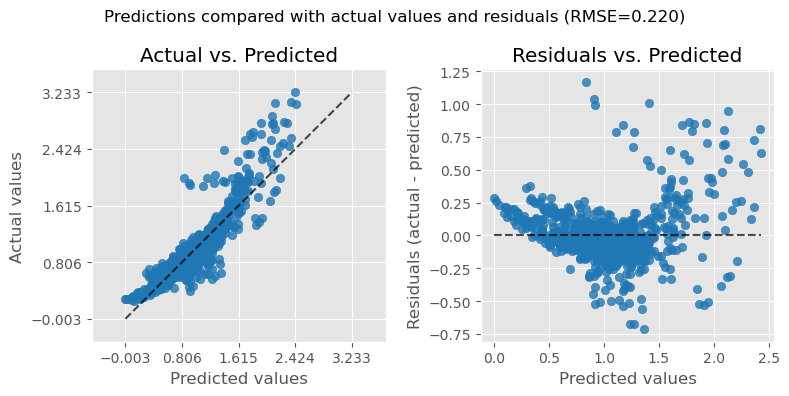

In [24]:
# Test the model with the testing data subset
from PyMLR import test_model
test_output_lasso_omara = test_model(train_model_lasso_omara['LassoLarsBIC'], X_test, y_test, 
    preprocess_result= train_output_lasso_omara['preprocess_result'],
    selected_features= train_output_lasso_omara['selected_features'])

# save the plot of predictions vs actual and residuals
test_output_lasso_omara['fig'].savefig("LassoLarsBIC_predictions_test_Salish_Sea_OmegaAra_vs_DO_mgl.png", dpi=300)

# Stepwise regression 

### Using best of all possible combinations of signficant features to minimize BIC

Fitting models for all 16384 subsets of features, this may take up to a minute, please wait ...

Best 10 subsets of features in model_outputs['step_features']:

|   Rank |      AIC |      BIC |   rsq_adj | Features                                                                |
|-------:|---------:|---------:|----------:|:------------------------------------------------------------------------|
|      0 | -689.828 | -629.195 |  0.779115 | ['RECOMMENDED_OXYGEN_MG_L' 'CTDTMP_DEG_C_ITS90' 'CTDSAL_PSS78'          |
|        |          |          |           |  'MONTH_UTC_2' 'MONTH_UTC_3' 'MONTH_UTC_4' 'MONTH_UTC_7' 'MONTH_UTC_9'  |
|        |          |          |           |  'MONTH_UTC_10']                                                        |
|      1 | -689.828 | -629.195 |  0.779115 | ['RECOMMENDED_OXYGEN_MG_L' 'CTDTMP_DEG_C_ITS90' 'CTDSAL_PSS78'          |
|        |          |          |           |  'MONTH_UTC_2' 'MONTH_UTC_3' 'MONTH_UTC_4' 'MONTH_UTC_7' 'MONTH_UTC_9'  |
|     

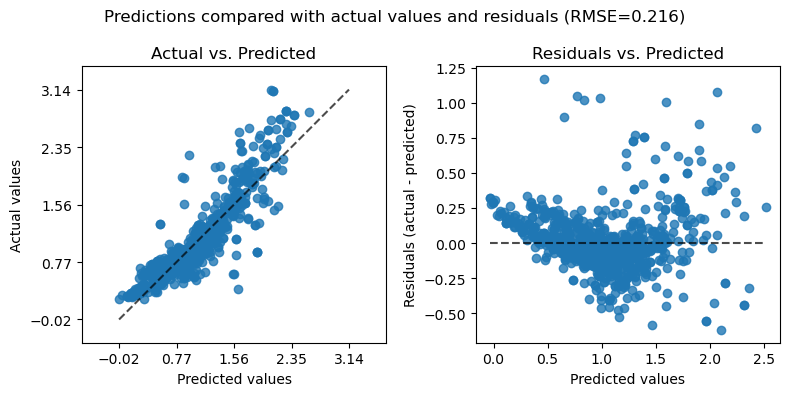

In [8]:
# Train the model with the training data subset
from PyMLR import stepwise
train_model_stepBIC, train_output_stepBIC = stepwise(
    X_train, y_train, criterion='bic', use_scaler=False,
    allow_dummies=True, direction='all')

In [26]:
selected_features = train_output_stepBIC['selected_features']
selected_features

['RECOMMENDED_OXYGEN_MG_L',
 'CTDTMP_DEG_C_ITS90',
 'CTDSAL_PSS78',
 'MONTH_UTC_2',
 'MONTH_UTC_3',
 'MONTH_UTC_4',
 'MONTH_UTC_7',
 'MONTH_UTC_9',
 'MONTH_UTC_10']

### Test the stepwise model with the independent test data

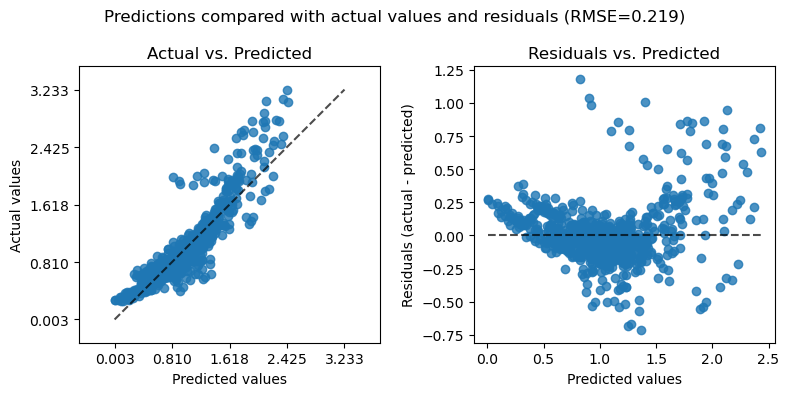

In [9]:
# standardize and encode X_test with the same scaler/encoder as the train step
from PyMLR import preprocess_test
X_test_proc = preprocess_test(X_test, train_output_stepBIC['preprocess_result'])

# use the selected features from the train step                              
selected_features = train_output_stepBIC['selected_features']

# calculated predicted values using statsmodels
import statsmodels.api as sm
y_pred = train_model_stepBIC.predict(sm.add_constant(X_test_proc[selected_features]))

# plot the predicted values vs actual values and residuals
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted")
rmse = np.sqrt(np.mean((y-y_pred)**2))
fig.suptitle(
    f"Predictions compared with actual values and residuals (RMSE={rmse:.3f})")
plt.tight_layout()
plt.savefig("StepBIC_predictions_test_OmegaAra_vs_DO_mgl.png", dpi=300)

### Final linear model with selected features from stepwise BIC

Fitting LinearRegression model, please wait ...

LinearRegression goodness of fit to training data in model_outputs['stats']:

| Statistic          |   LinearRegression |
|:-------------------|-------------------:|
| r-squared          |        0.783964    |
| adjusted r-squared |        0.783473    |
| n_samples          |     3971           |
| df residuals       |     3962           |
| df model           |        8           |
| F-statistic        |     1797.19        |
| Prob (F-statistic) |        1.11022e-16 |
| RMSE               |        0.216752    |
| Log-Likelihood     |      437.064       |
| AIC                |     -856.128       |
| BIC                |     -799.547       |

Parameters of fitted model in model_outputs['popt']:

| Feature                 |   Parameter |
|:------------------------|------------:|
| Intercept               |  -3.28418   |
| RECOMMENDED_OXYGEN_MG_L |   0.172675  |
| CTDTMP_DEG_C_ITS90      |   0.0723475 |
| CTDSAL_PSS78            |   0.0834

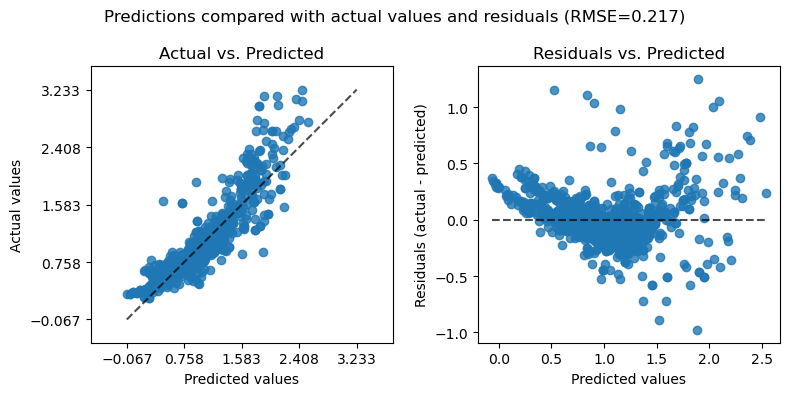

In [10]:
from PyMLR import linear
final_model_linear, final_output_linear = linear(
    X, y, 
    use_scaler=False,
    selected_features = train_output_stepBIC['selected_features']
    )

Performing 4-step model agnostic analysis, please wait...

Step 1: Model skill metrics and residuals plot, please wait...

Model skill metrics:

| Statistic          |     Regressor |
|:-------------------|--------------:|
| R-squared          |    0.783964   |
| MSE                |    0.0469813  |
| RMSE               |    0.216752   |
| Explained Variance |    0.783964   |
| MAE                |    0.145052   |
| Max Error          |    1.30006    |
| MAPE               |    0.156796   |
| MSLE               |    0.00986008 |
| n_samples          | 3971          |



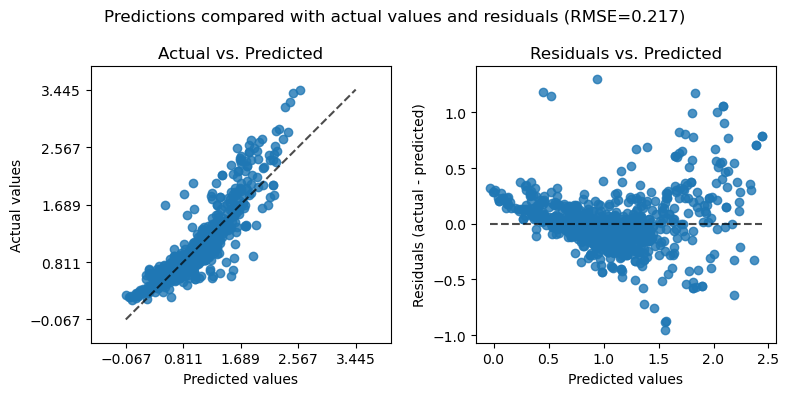

Step 2: SHAP Beeswarm and Bar importance...


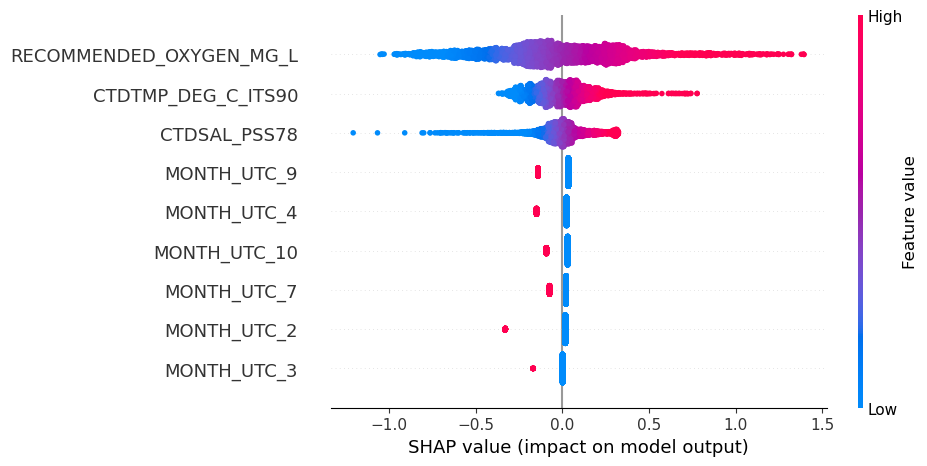

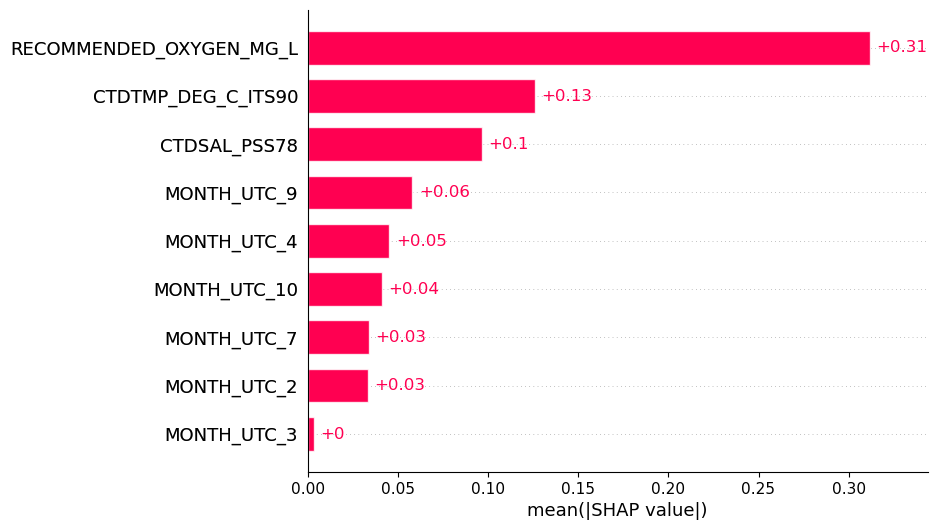

Step 3: Permutation Importance...


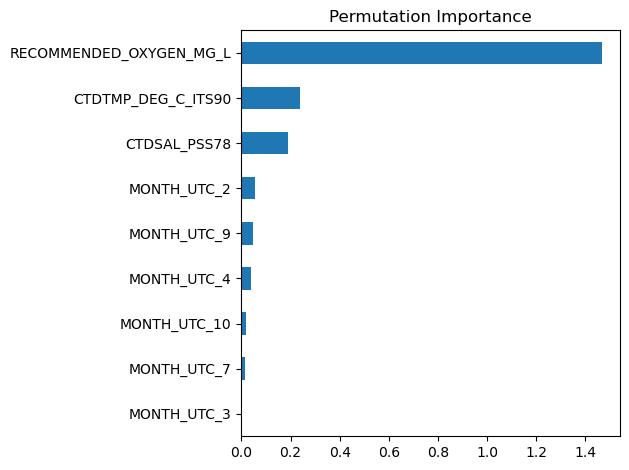

Step 4: PDP + ICE plots of each continuous features...
processing feature:  RECOMMENDED_OXYGEN_MG_L


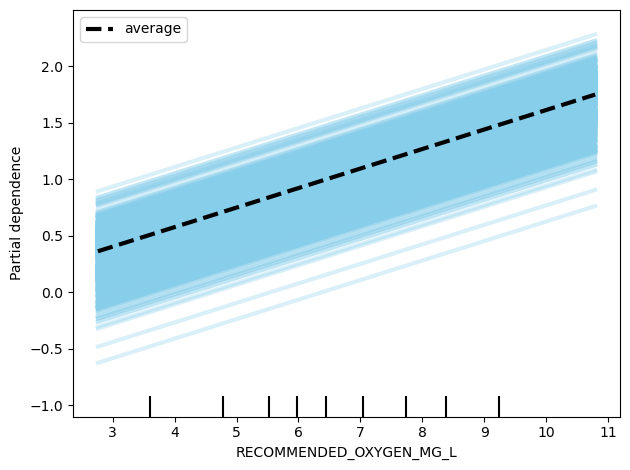

processing feature:  CTDTMP_DEG_C_ITS90


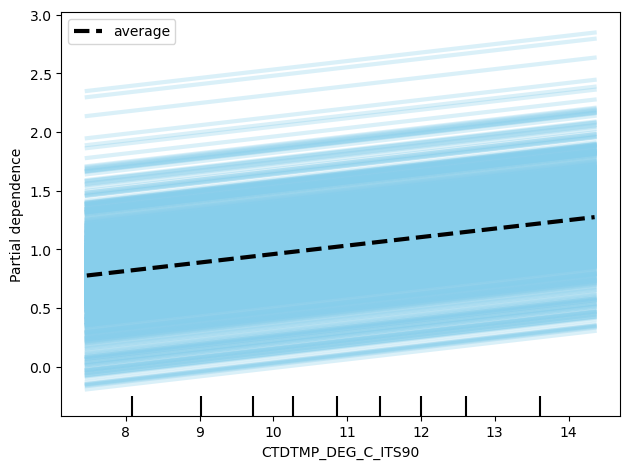

processing feature:  CTDSAL_PSS78


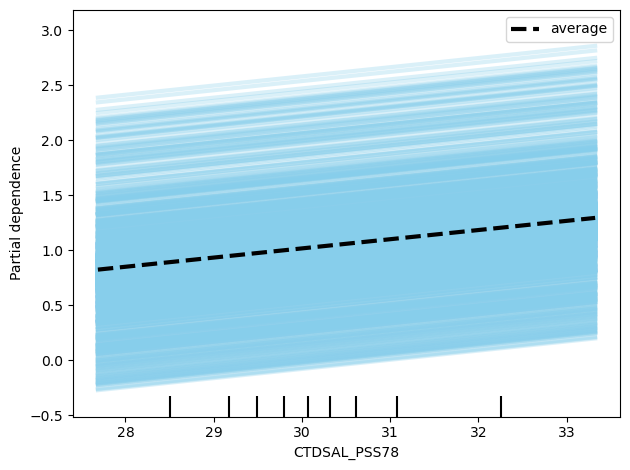

Interpretability plots saved to: model_agnostic_linear_omara
Done
Time elapsed: 5.19 sec



In [11]:
# Model agnostics
from PyMLR import model_agnostic
agnostic_output_linear = model_agnostic(final_model_linear, X, y, 
    preprocess_result= final_output_linear['preprocess_result'],
    selected_features= final_output_linear['selected_features'],
    output_dir= 'model_agnostic_linear_omara',
    show=True)

### Final linear model fit with statsmodels OLS

In [12]:
from PyMLR import preprocess_train
import statsmodels.api as sm
print('Fitting statsmodels OLS...')
selected_features = train_output_stepBIC['selected_features']
preprocess_result_final = preprocess_train(X, use_scaler=False)
X_proc = preprocess_result_final['df_processed']
final_model_sm_ols = sm.OLS(y, sm.add_constant(X_proc[selected_features])).fit()
print(final_model_sm_ols.summary())
print('Done')

Fitting statsmodels OLS...
                              OLS Regression Results                             
Dep. Variable:     OmegaAragonite_Lueker   R-squared:                       0.784
Model:                               OLS   Adj. R-squared:                  0.783
Method:                    Least Squares   F-statistic:                     1597.
Date:                   Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                           18:55:26   Log-Likelihood:                 437.06
No. Observations:                   3971   AIC:                            -854.1
Df Residuals:                       3961   BIC:                            -791.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [13]:
# Variance Inflation Factors of selected_features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_ = sm.add_constant(X_proc[selected_features])    
vif = pd.DataFrame()
vif['Feature'] = X_.columns.to_list()
vif["VIF"] = [variance_inflation_factor(X_.values, i)
                    for i in range(len(X_.columns))]
vif.set_index('Feature',inplace=True)
print("\nVariance Inflation Factors of selected_features:")
print("Note: VIF>5 indicates excessive collinearity\n")
print(vif.to_markdown(index=True))


Variance Inflation Factors of selected_features:
Note: VIF>5 indicates excessive collinearity

| Feature                 |       VIF |
|:------------------------|----------:|
| const                   | 971.095   |
| RECOMMENDED_OXYGEN_MG_L |   2.09618 |
| CTDTMP_DEG_C_ITS90      |   3.0762  |
| CTDSAL_PSS78            |   2.10321 |
| MONTH_UTC_2             |   1.68372 |
| MONTH_UTC_3             |   1.07426 |
| MONTH_UTC_4             |   2.47919 |
| MONTH_UTC_7             |   2.32081 |
| MONTH_UTC_9             |   2.4897  |
| MONTH_UTC_10            |   1.92556 |


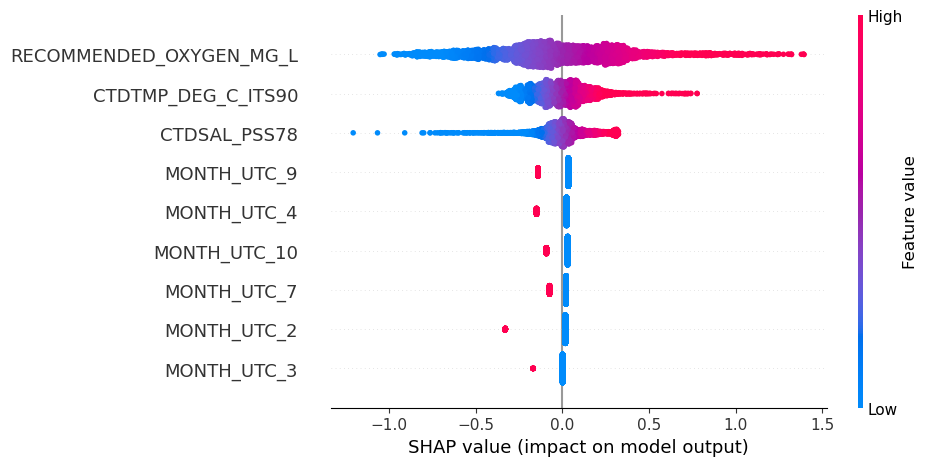

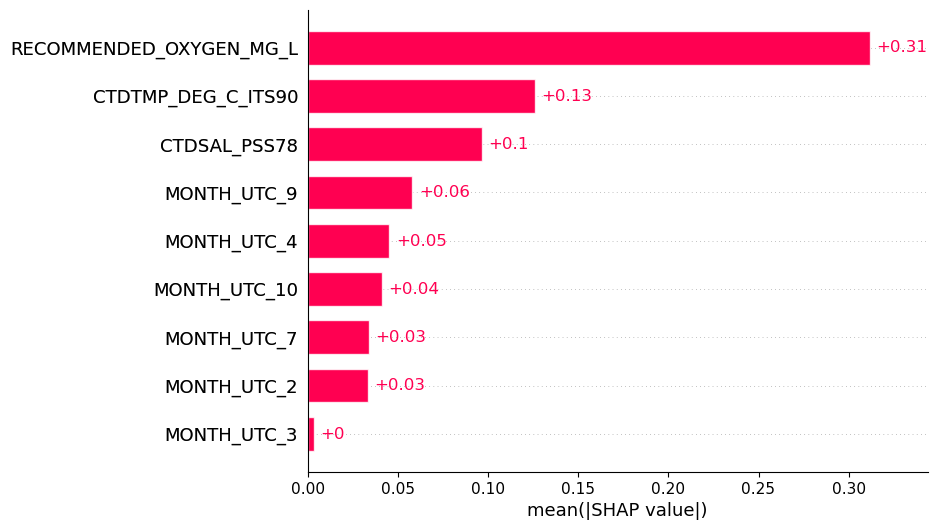

In [14]:
import shap
model = final_model_linear
X_test_proc = X_proc[selected_features]
explainer = shap.LinearExplainer(model, X_test_proc)
shap_values = explainer(X_test_proc)
# Beeswarm
shap.plots.beeswarm(shap_values, show=False)
plt.savefig(f"shap_beeswarm_linear_omara.png", dpi=300, bbox_inches='tight')
plt.close()
shap.plots.beeswarm(shap_values, show=True)
plt.close()
# Bar plot for global feature importance
shap.plots.bar(shap_values, show=False)
plt.savefig(f"shap_bar_importance_linear_omara.png", dpi=300, bbox_inches='tight')
plt.close()
shap.plots.bar(shap_values, show=True)
plt.close()
